# Проект: Исследовательский анализ данных и проверка гипотез

- Автор: Гуреев Константин Викторович

Для цели проекта нужно решить следующие задачи:
- Шаг 1: Загрузка данных и знакомство с ними;
- Шаг 2: Предобработка данных и подготовка их к исследованию;
- Шаг 3: Исследовательский анализ данных;
- Шаг 4: Статистический анализ данных;
- Шаг 5: Общий вывод и рекомендации.

# Шаг 1: Загрузка данных и знакомство с ними. 

In [1]:
# загрузим необходимые библиотеки для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# загрузим наши таблицы
orders_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
events_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
tenge_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [3]:
# Изучим данные методом info а также первые строки таблиц
orders_df.info()
orders_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [4]:
events_df.info()
events_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [5]:
tenge_df.info()
tenge_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


`orders_df` содержит 290849 строк и 11 столбцов. Столбцы хранят информацию в следующих форматах:`float64` - 3, `int64` - 4, `object` - 7. Пропуски есть в столбце `days_since_prev`, что говорит о том, что пользователь делал покупку билетов впервые.

`events_df` содержит 22427 строк и 11 столбцов. Столбцы хранят информацию в следующих форматах: `int64` - 3, `object` - 8.

`tenge_df` содержит 357 строк и 4 столбцов. Столбцы хранят информацию в следующих форматах:`float64` - 1, `int64` - 1, `object` - 2.

# Шаг 2:  Предобработка данных и подготовка их к исследованию

In [6]:
# для удобства обработки объединим данные в единый датафрейм
# Объединяем orders_df и events_df по event_id
merged_df = pd.merge(orders_df, events_df, on='event_id', how='inner')

# Добавляем данные из tenge_df
final_df = pd.merge(merged_df, tenge_df, left_on='created_dt_msk', right_on='data', how='left')


In [7]:
# посмотрим результат
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name          

In [8]:
# Анализ категориальных переменных 
print("Анализ категориальных переменных:")

# Анализ валюты
print("\nРаспределение по валюте:")
print(final_df['currency_code'].value_counts(dropna=False))

# Анализ устройства
print("\nРаспределение по типу устройства:")
print(final_df['device_type_canonical'].value_counts(dropna=False))

# Анализ сети кинотеатров
print("\nРаспределение по сети кинотеатров:")
print(final_df['cinema_circuit'].value_counts(dropna=False))

# Анализ сервиса
print("\nРаспределение по билетному оператору:")
print(final_df['service_name'].value_counts(dropna=False))

Анализ категориальных переменных:

Распределение по валюте:
rub    285542
kzt      5069
Name: currency_code, dtype: int64

Распределение по типу устройства:
mobile     232490
desktop     58121
Name: device_type_canonical, dtype: int64

Распределение по сети кинотеатров:
нет           289213
Другое          1261
КиноСити         122
Москино            7
Киномакс           7
ЦентрФильм         1
Name: cinema_circuit, dtype: int64

Распределение по билетному оператору:
Билеты без проблем        63519
Лови билет!               41124
Билеты в руки             40343
Мой билет                 34839
Облачко                   26642
Лучшие билеты             17774
Весь в билетах            16849
Прачечная                 10273
Край билетов               6207
Тебе билет!                5228
Яблоко                     5039
Дом культуры               4502
За билетом!                2865
Городской дом культуры     2733
Show_ticket                2200
Мир касс                   2167
Быстробилет      

In [9]:
# Анализ типов мероприятий
print("\nРаспределение по типу мероприятия:")
print(final_df['event_type_main'].value_counts(dropna=False))
# Анализ возрастных ограничений
print("\nРаспределение по возрастным ограничениям")
print(final_df['age_limit'].value_counts(dropna=False))
# Анализ описаний мероприятий 
print("\nРаспределение по описаниям мероприятий")
print(final_df['event_type_description'].value_counts(dropna=False))


Распределение по типу мероприятия:
концерты    115276
театр        67321
другое       65867
спорт        21911
стендап      13393
выставки      4854
ёлки          1989
Name: event_type_main, dtype: int64

Распределение по возрастным ограничениям
16    78556
12    62474
0     61487
6     52161
18    35933
Name: age_limit, dtype: int64

Распределение по описаниям мероприятий
концерт                   112049
событие                    58605
спектакль                  50592
шоу                        13626
спорт                      12837
мюзикл                      9919
спортивное мероприятие      9074
балет                       5998
выставка                    5876
цирковое шоу                5327
фестиваль                   4273
опера                       1314
ёлка                         945
музыкальный спектакль        140
кукольный спектакль           13
экскурсия                      8
оперетта                       7
подарок                        4
снегурочка                   

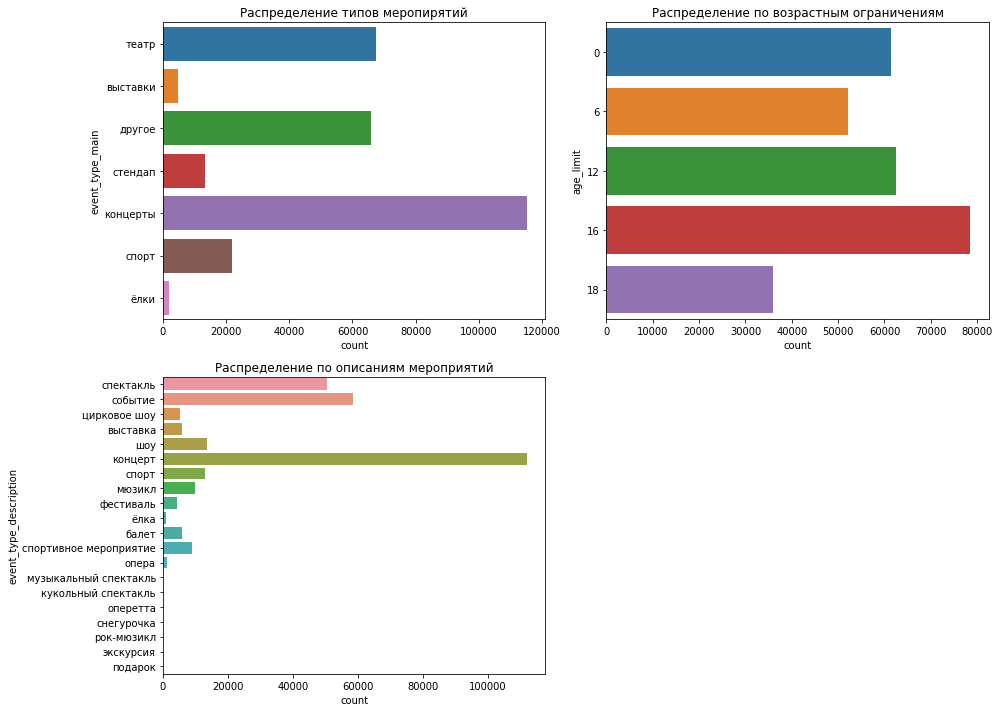

In [10]:
# Визуализация распределения категориальных переменных
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.countplot(y=final_df['event_type_main'])
plt.title('Распределение типов меропирятий')

plt.subplot(2, 2, 2)
sns.countplot(y=final_df['age_limit'])
plt.title('Распределение по возрастным ограничениям')

plt.subplot(2, 2, 3)
sns.countplot(y=final_df['event_type_description'])
plt.title('Распределение по описаниям мероприятий')

plt.tight_layout()
plt.show()

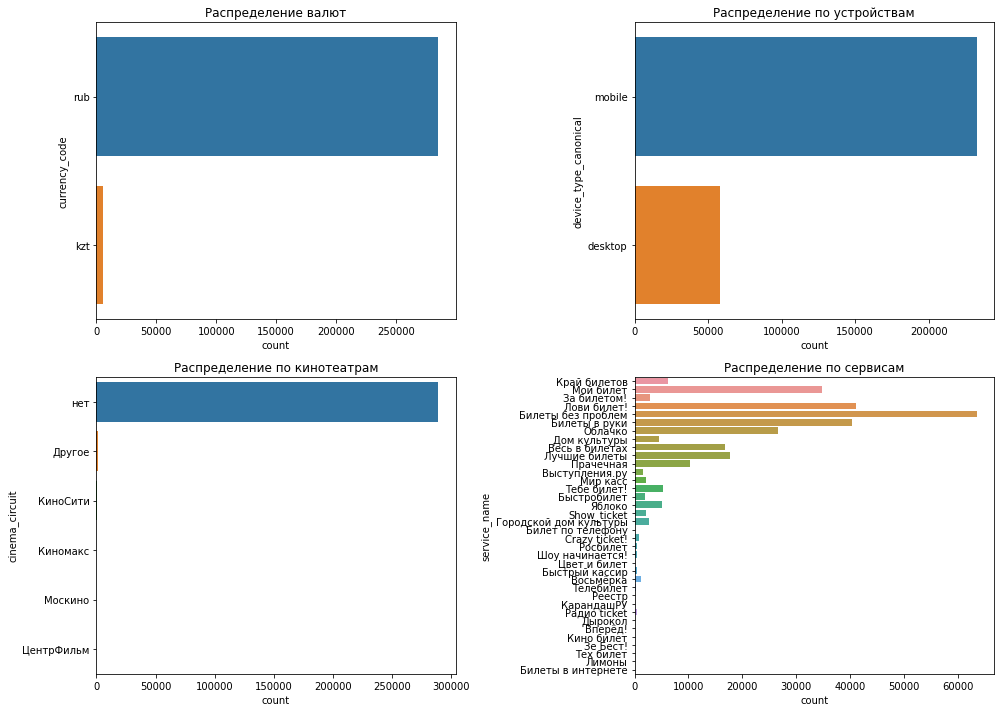

In [11]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.countplot(y=final_df['currency_code'])
plt.title('Распределение валют')

plt.subplot(2, 2, 2)
sns.countplot(y=final_df['device_type_canonical'])
plt.title('Распределение по устройствам')

plt.subplot(2, 2, 3)
sns.countplot(y=final_df['cinema_circuit'])
plt.title('Распределение по кинотеатрам')

plt.subplot(2, 2, 4)
sns.countplot(y=final_df['service_name'])
plt.title('Распределение по сервисам')

plt.tight_layout()
plt.show()

`сinema_circuit` - в большенстве случаев имеет значение "нет" что говорит о не применимости данного критерия. Т. к. данный столбец несет малую ценность для дальнейшего анализа удалим его.

В столбцах `currency_code`, `device_type_canonical`, `service_name`, `event_type_main`, `age_limit`, `event_type_description` аномалий не обнаружено



In [12]:
# Удаляем столбец cinema_circuit
final_df = final_df.drop(columns=['cinema_circuit'])


In [13]:
# Проверяем результат
print("Список оставшихся столбцов после удаления:")
print(final_df.columns)

Список оставшихся столбцов после удаления:
Index(['order_id', 'user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'age_limit', 'currency_code', 'device_type_canonical', 'revenue',
       'service_name', 'tickets_count', 'total', 'days_since_prev',
       'event_name', 'event_type_description', 'event_type_main', 'organizers',
       'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name',
       'venue_address', 'data', 'nominal', 'curs', 'cdx'],
      dtype='object')


In [14]:
# Анализ количественных переменных
# Разделение по валюте
df_rub = final_df[final_df['currency_code'] == 'rub'].copy()
df_kzt = final_df[final_df['currency_code'] == 'kzt'].copy()

In [15]:
# Анализ выручки
print("\nСтатистическая сводка выручки в рублях:")
print(df_rub['revenue'].describe())

print("\nСтатистическая сводка выручки в тенге:")
print(df_kzt['revenue'].describe())


Статистическая сводка выручки в рублях:
count    285542.000000
mean        548.013929
std         871.750181
min         -90.760000
25%         114.170000
50%         346.630000
75%         793.320000
max       81174.540000
Name: revenue, dtype: float64

Статистическая сводка выручки в тенге:
count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64


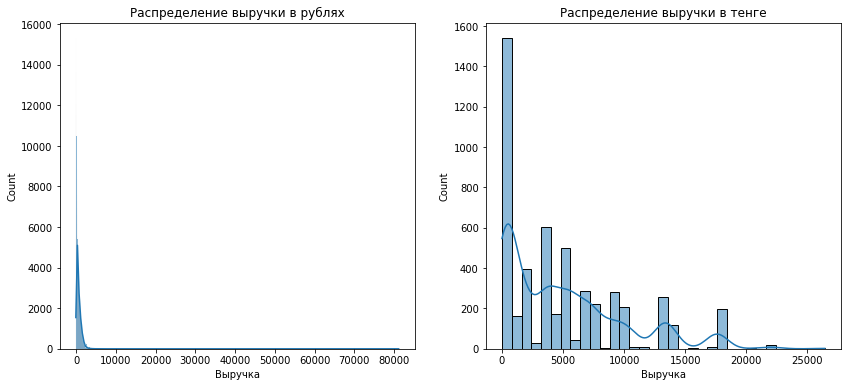

In [16]:
# Визуализация распределения выручки
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_rub['revenue'], kde=True)
plt.title('Распределение выручки в рублях')
plt.xlabel('Выручка')

plt.subplot(1, 2, 2)
sns.histplot(df_kzt['revenue'], kde=True)
plt.title('Распределение выручки в тенге')
plt.xlabel('Выручка')

plt.show()


Статистическая сводка количества билетов:
count    290611.000000
mean          2.754311
std           1.170620
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64


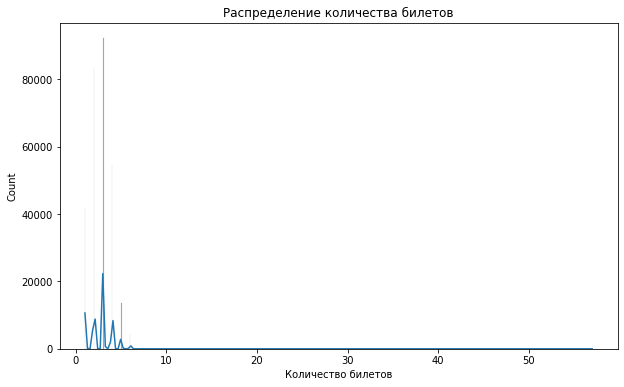

In [17]:
# Анализ количества билетов
print("\nСтатистическая сводка количества билетов:")
print(final_df['tickets_count'].describe())

# Визуализация распределения количества билетов
plt.figure(figsize=(10, 6))
sns.histplot(final_df['tickets_count'], kde=True)
plt.title('Распределение количества билетов')
plt.xlabel('Количество билетов')
plt.show()

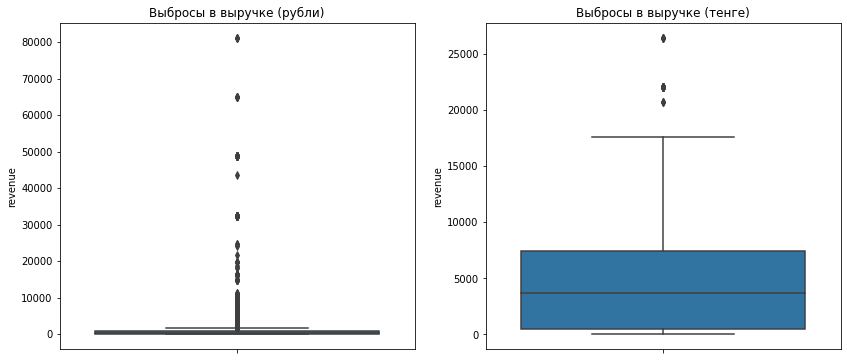

In [18]:
# Проверка на выбросы
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_rub['revenue'])
plt.title('Выбросы в выручке (рубли)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_kzt['revenue'])
plt.title('Выбросы в выручке (тенге)')

plt.show()

| Показатель          | Рубль           | Тенге            |
|---------------------|-----------------|------------------|
| **Количество**      | 285 542         | 5 069            |
| **Среднее**         | 548.01 руб.     | 4 995.21 тенге   |
| **Стандартное откл.**| 871.75 руб.     | 4 916.75 тенге   |
| **Минимум**         | -90.76 руб.     | 0 тенге          |
| **Медиана**         | 346.63 руб.     | 3 698.83 тенге   |
| **Максимум**        | 81 174.54 руб.  | 26 425.86 тенге  |


В обоих случаях распределение выручки имеет правостороннюю асимметрию

Значительный разброс значений относительно среднего.
Применим обработку выбросов с учетом как верхних, так и нижних границ.

In [19]:
# Расчет процентилей для каждой валюты
rub_99_percentile = final_df[final_df['currency_code'] == 'rub']['revenue'].quantile(0.99)
rub_1_percentile = final_df[final_df['currency_code'] == 'rub']['revenue'].quantile(0.01)

kzt_99_percentile = final_df[final_df['currency_code'] == 'kzt']['revenue'].quantile(0.99)
kzt_1_percentile = final_df[final_df['currency_code'] == 'kzt']['revenue'].quantile(0.01)

# Создание копий датафреймов
df_rub = final_df[final_df['currency_code'] == 'rub'].copy()
df_kzt = final_df[final_df['currency_code'] == 'kzt'].copy()

# Обработка выбросов с учетом нижней и верхней границы
df_rub['revenue'] = df_rub['revenue'].clip(
    lower=rub_1_percentile,
    upper=rub_99_percentile
)

df_kzt['revenue'] = df_kzt['revenue'].clip(
    lower=kzt_1_percentile,
    upper=kzt_99_percentile
)

In [20]:
# Объединение обработанных датафреймов
final_df_cleaned = pd.concat([df_rub, df_kzt], ignore_index=True)

# Проверка результатов
print("Статистика после обработки выбросов:")
print(final_df_cleaned.groupby('currency_code')['revenue'].describe())

Статистика после обработки выбросов:
                  count         mean          std    min     25%      50%  \
currency_code                                                               
kzt              5069.0  4966.740665  4825.207309  90.27  518.10  3698.83   
rub            285542.0   531.011828   538.212793   0.00  114.17   346.63   

                   75%       max  
currency_code                     
kzt            7397.66  17617.24  
rub             793.32   2570.80  


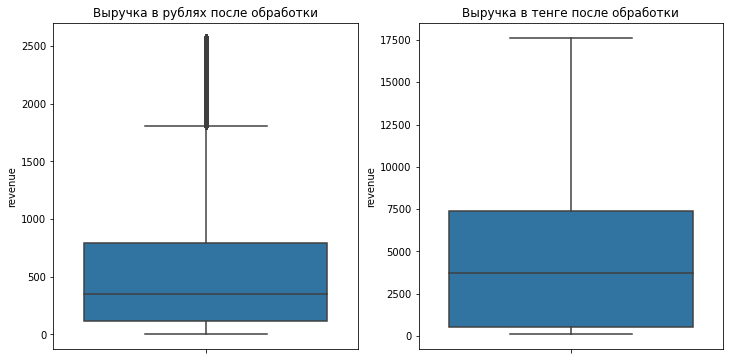

In [21]:
# Дополнительная проверка на выбросы
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=final_df_cleaned[final_df_cleaned['currency_code'] == 'rub']['revenue'])
plt.title('Выручка в рублях после обработки')

plt.subplot(1, 2, 2)
sns.boxplot(y=final_df_cleaned[final_df_cleaned['currency_code'] == 'kzt']['revenue'])
plt.title('Выручка в тенге после обработки')

plt.show()

| Показатель           | Рубль (до)      | Рубль (после)   | Тенге (до)      | Тенге (после)   |
|---------------------|-----------------|-----------------|-----------------|-----------------|
| **Количество**      | 285 542         | 285 542         | 5 069           | 5 069           |
| **Среднее**         | 548.01 руб.     | 531.01 руб.     | 4 995.21 тенге  | 4 966.74 тенге  |
| **Стандартное откл.**| 871.75 руб.     | 538.21 руб.     | 4 916.75 тенге  | 4 825.21 тенге  |
| **Минимум**         | -90.76 руб.     | 0.00 руб.       | 0.00 тенге      | 90.27 тенге     |
| **25%**             | 114.17 руб.     | 114.17 руб.     | 518.10 тенге    | 518.10 тенге    |
| **Медиана**         | 346.63 руб.     | 346.63 руб.     | 3 698.83 тенге  | 3 698.83 тенге  |
| **75%**             | 793.32 руб.     | 793.32 руб.     | 7 397.66 тенге  | 7 397.66 тенге  |
| **Максимум**        | 81 174.54 руб.  | 2 570.80 руб.   | 26 425.86 тенге | 17 617.24 тенге |

**Изменения после обработки:**

**Рубль:**
* Среднее снизилось на 17 руб.
* Std уменьшился на 333.54 руб.
* Исчезли отрицательные значения
* Максимум уменьшился на 78 603.74 руб.

**Тенге:**
* Среднее снизилось на 28.47 тенге
* Std уменьшился на 91.54 тенге
* Минимум увеличился на 90.27 тенге
* Максимум уменьшился на 8 808.62 тенге


In [22]:
# проверим явные и не явные дубликаты в данных
# Проверка явных дубликатов
print("Количество явных дубликатов:", final_df_cleaned.duplicated().sum())

# Просмотр дублирующихся строк
duplicates = final_df_cleaned[final_df_cleaned.duplicated(keep=False)]
print(duplicates.head())

Количество явных дубликатов: 0
Empty DataFrame
Columns: [order_id, user_id, created_dt_msk, created_ts_msk, event_id, age_limit, currency_code, device_type_canonical, revenue, service_name, tickets_count, total, days_since_prev, event_name, event_type_description, event_type_main, organizers, region_name, city_name, city_id, venue_id, venue_name, venue_address, data, nominal, curs, cdx]
Index: []

[0 rows x 27 columns]


In [23]:
# Определяем список столбцов для проверки дубликатов (исключаем order_id)
check_columns = [
    'user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
    'age_limit', 'currency_code', 'device_type_canonical',
    'revenue', 'service_name', 'tickets_count', 'total',
    'days_since_prev', 'event_name', 'event_type_description',
    'event_type_main', 'organizers', 'region_name', 'city_name',
    'city_id', 'venue_id', 'venue_name', 'venue_address',
    'data', 'nominal', 'curs', 'cdx'
]

# Находим дубликаты по выбранным столбцам
duplicates = final_df_cleaned.duplicated(subset=check_columns, keep=False)

# Создаем датафрейм с дубликатами
duplicate_records = final_df_cleaned[duplicates]

# Анализируем результаты
print(f"Количество потенциальных дубликатов: {len(duplicate_records)}")

Количество потенциальных дубликатов: 58


In [24]:
# Выводим подробную информацию о дубликатах
if not duplicate_records.empty:
    print("Примеры дублирующихся записей:")
    print(duplicate_records[['user_id', 'created_ts_msk', 'event_id', 
                            'tickets_count', 'revenue', 'venue_name']].head(10))
    
else:
    print("Дубликаты не найдены")

Примеры дублирующихся записей:
               user_id       created_ts_msk  event_id  tickets_count  revenue  \
3838   a0384c26d91e09e  2024-08-24 00:07:14    534657              2   679.21   
3839   a0384c26d91e09e  2024-08-24 00:07:14    534657              2   679.21   
8912   c7a762e320f0def  2024-06-19 11:07:59    538926              3     0.00   
8915   c7a762e320f0def  2024-06-19 11:07:59    538926              3     0.00   
46350  7eb4fc207ecc10f  2024-08-23 14:08:19    298035              1   126.84   
46353  7eb4fc207ecc10f  2024-08-23 14:08:19    298035              1   126.84   
46357  7eb4fc207ecc10f  2024-08-23 14:08:19    298035              1   126.84   
76715  8d6c1ff89fac35f  2024-10-31 22:28:57    589624              1    41.83   
76771  8d6c1ff89fac35f  2024-10-31 22:28:57    589624              1    41.83   
97961  cbe06d8837e87fb  2024-10-01 11:20:05    574431              4   155.99   

                                              venue_name  
3838              

**Выводы по анализу**
Мы обнаружили 58 потенциальных неявных дубликатов(без учета order_id) исходя из одинаковых сумм и временных меток в данном случае данные записи можно считать технической ошибкой при оформлении заказа.

Удалим данные дублирующие строки.

In [25]:
# Сохраняем исходную длину датафрейма
original_length = len(final_df_cleaned)
# Удаляем дубликаты, сохраняя первое вхождение
final_df_cleaned = final_df_cleaned.drop_duplicates(
    subset=check_columns, 
    keep='first'
)

# Подсчитываем количество удаленных записей
removed_duplicates = original_length - len(final_df_cleaned)

print(f"Удалено дубликатов: {removed_duplicates}")

Удалено дубликатов: 30


In [26]:
# проверим результат
final_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290581 entries, 0 to 290610
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290581 non-null  int64  
 1   user_id                 290581 non-null  object 
 2   created_dt_msk          290581 non-null  object 
 3   created_ts_msk          290581 non-null  object 
 4   event_id                290581 non-null  int64  
 5   age_limit               290581 non-null  int64  
 6   currency_code           290581 non-null  object 
 7   device_type_canonical   290581 non-null  object 
 8   revenue                 290581 non-null  float64
 9   service_name            290581 non-null  object 
 10  tickets_count           290581 non-null  int64  
 11  total                   290581 non-null  float64
 12  days_since_prev         268668 non-null  float64
 13  event_name              290581 non-null  object 
 14  event_type_descripti

In [27]:
# Проведем преобразование данных с датой и временем
final_df_cleaned['created_dt_msk'] = pd.to_datetime(final_df_cleaned['created_dt_msk'])
final_df_cleaned['created_ts_msk'] = pd.to_datetime(final_df_cleaned['created_ts_msk'])

In [28]:
# Преобразование оставшихся int64 в int32 для экономии памяти
int_cols = [
    'order_id',
    'event_id',
    'age_limit',
    'tickets_count',
    'city_id',
    'venue_id',
    'nominal'
]
final_df_cleaned[int_cols] = final_df_cleaned[int_cols].astype('int32')

In [29]:
# Проверка результатов
print(final_df_cleaned.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290581 entries, 0 to 290610
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290581 non-null  int32         
 1   user_id                 290581 non-null  object        
 2   created_dt_msk          290581 non-null  datetime64[ns]
 3   created_ts_msk          290581 non-null  datetime64[ns]
 4   event_id                290581 non-null  int32         
 5   age_limit               290581 non-null  int32         
 6   currency_code           290581 non-null  object        
 7   device_type_canonical   290581 non-null  object        
 8   revenue                 290581 non-null  float64       
 9   service_name            290581 non-null  object        
 10  tickets_count           290581 non-null  int32         
 11  total                   290581 non-null  float64       
 12  days_since_prev         268668

In [30]:
# Создаем новый столбец revenue_rub с учетом курса за 100 тенге
final_df_cleaned['revenue_rub'] = final_df_cleaned.apply(
    lambda row: 
        row['revenue'] * (row['curs'] / 100)  # корректируем курс для 1 тенге
        if row['currency_code'] == 'kzt' 
        else row['revenue'],
    axis=1
)

In [31]:
# Создаем новый столбец с выручкой на один билет
final_df_cleaned['one_ticket_revenue_rub'] = final_df_cleaned['revenue_rub'] / final_df_cleaned['tickets_count']

In [32]:
# Создаем столбец с месяцем
final_df_cleaned['month'] = final_df_cleaned['created_dt_msk'].dt.month

# Создаем словарь для определения сезона
season_map = {
    12: 'зима', 1: 'зима', 2: 'зима',  # декабрь-февраль
    3: 'весна', 4: 'весна', 5: 'весна',  # март-май
    6: 'лето', 7: 'лето', 8: 'лето',  # июнь-август
    9: 'осень', 10: 'осень', 11: 'осень'  # сентябрь-ноябрь
}

# Создаем столбец с сезоном
final_df_cleaned['season'] = final_df_cleaned['month'].map(season_map)

# Проверяем результаты
print(final_df_cleaned[['created_dt_msk', 'month', 'season']].head())

# Проверяем распределение по сезонам
print(final_df_cleaned['season'].value_counts())


  created_dt_msk  month season
0     2024-08-20      8   лето
1     2024-07-23      7   лето
2     2024-07-23      7   лето
3     2024-07-23      7   лето
4     2024-07-23      7   лето
осень    170160
лето     120421
Name: season, dtype: int64


**Мы провели предобработку данных:**
- объединили все данные в единый датафрейм для удобства анализа.
- провели проверк столбцов с категориальными переменными: `сinema_circuit` - в большенстве случаев имеет значение "нет" что говорит о не применимости данного критерия. Т. к. данный столбец несет малую ценность для дальнейшего анализа мы его удалили.
- В столбцах `currency_code`, `device_type_canonical`, `service_name`, `event_type_main`, `age_limit`, `event_type_description` аномалий не обнаружено
- провели проверку количественных переменных на предмет выбросом:
| Показатель          | Рубль           | Тенге            |
|---------------------|-----------------|------------------|
| **Количество**      | 285 542         | 5 069            |
| **Среднее**         | 548.01 руб.     | 4 995.21 тенге   |
| **Стандартное откл.**| 871.75 руб.     | 4 916.75 тенге   |
| **Минимум**         | -90.76 руб.     | 0 тенге          |
| **Медиана**         | 346.63 руб.     | 3 698.83 тенге   |
| **Максимум**        | 81 174.54 руб.  | 26 425.86 тенге  |


В обоих случаях распределение выручки имеет правостороннюю асимметрию

Значительный разброс значений относительно среднего.
**Изменения после обработки:**

**Рубль:**
* Среднее снизилось на 17 руб.
* Std уменьшился на 333.54 руб.
* Исчезли отрицательные значения
* Максимум уменьшился на 78 603.74 руб.

**Тенге:**
* Среднее снизилось на 28.47 тенге
* Std уменьшился на 91.54 тенге
* Минимум увеличился на 90.27 тенге
* Максимум уменьшился на 8 808.62 тенге
- Явных дубликатов в данных обнаружено не было
- Было удалено 30 неявных дубликатов(при анализе было выявлено что данные записи были результатом технической ошибки при оформлении заказов)
- Провели столбцы с датой и временем в подходящий форормат, а также оптимизировали разрядность для столбцов содержащих целочисленные значения.

**Для дальнешего анализа были созданы следующие столбцы:**
- `revenue_rub` - содержит выручку из столбца `revenue` переведенную из тенге по курсу 2024 года.
- `month` - содержит номер месяца оформления заказа.
- `season` - содержит информацию о сезонности.

# Шаг 3: Исследовательский анализ данных

## 3.1. Анализ распределения заказов по сегментам и их сезонные изменения

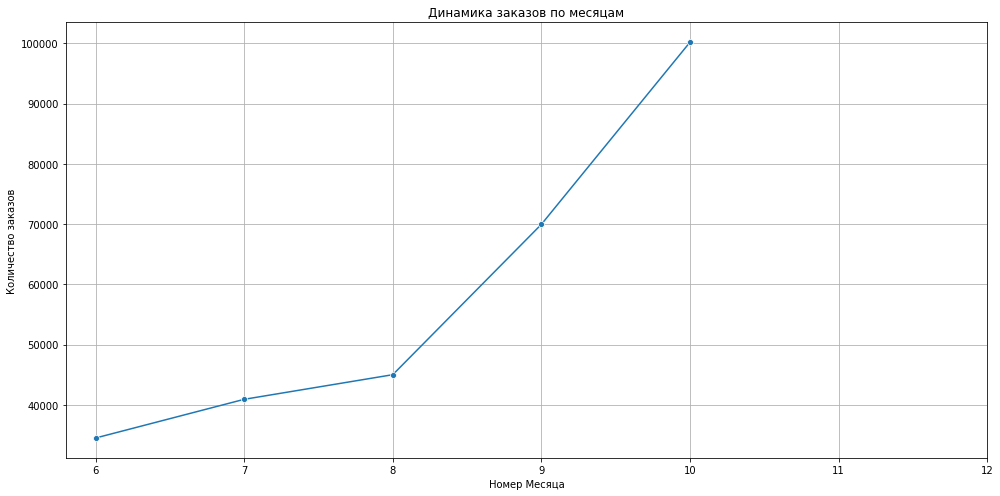

In [33]:
# Группируем данные и сортируем по месяцам
monthly_analysis = final_df_cleaned.groupby(['month']).agg(
    order_count=('order_id', 'nunique'),
    revenue=('revenue_rub', 'sum')
).reset_index()

# Сортируем результат по месяцу
monthly_analysis = monthly_analysis.sort_values(by='month')

# Создаем график
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_analysis,
    x='month',
    y='order_count',
    marker='o'  # Добавляем маркеры для лучшей визуализации
)

# Улучшаем оформление графика
plt.title('Динамика заказов по месяцам')
plt.xlabel('Номер Месяца')
plt.ylabel('Количество заказов')
plt.xticks(range(6, 13))  # Устанавливаем все месяцы на оси X
plt.grid(True)
plt.tight_layout()  # Корректируем расположение элементов
plt.show()

На данном графике мы наблюдаем увеличение числа заказов с июня по ноябрь(резкий скачок начинается с августа).
Осенью наблюдается наибольший объем заказов, что подтверждает сезонный рост активности.

   season event_type_main  order_count
9   осень        концерты     0.374553
12  осень           театр     0.253315
8   осень          другое     0.195622
10  осень           спорт     0.111031
11  осень         стендап     0.041091
7   осень        выставки     0.014322
13  осень            ёлки     0.010067
2    лето        концерты     0.427982
1    лето          другое     0.270451
5    лето           театр     0.201036
4    лето         стендап     0.053155
3    лето           спорт     0.025021
0    лето        выставки     0.020063
6    лето            ёлки     0.002292


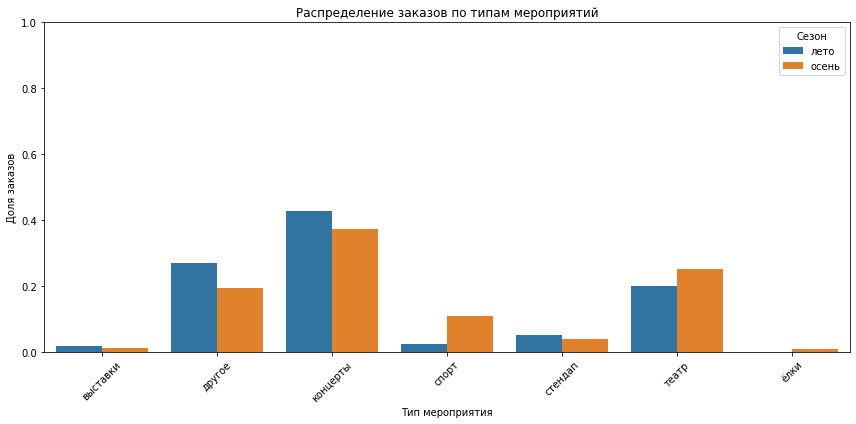

In [34]:
# Подготовка данных для анализа типов мероприятий
event_type_analysis = final_df_cleaned.groupby(['season', 'event_type_main']).agg(
    order_count=('order_id', 'nunique')
).groupby('season').apply(lambda x: x / x.sum()).reset_index()
print(event_type_analysis.sort_values(by=['season', 'order_count'],ascending = False))
# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(
    data=event_type_analysis,
    x='event_type_main',
    y='order_count',
    hue='season',
    ci=None
)
plt.title('Распределение заказов по типам мероприятий')
plt.ylabel('Доля заказов')
plt.xlabel('Тип мероприятия')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Сезон')
plt.tight_layout()
plt.show()

Концерты остаются самым популярным типом мероприятий в оба сезона:

Лето: 42.79%

Осень: 37.45%

Летний период:
Более высокая доля концертов (42.79% против 37.45%)

Осенний период: Рост популярности театра (25.33% против 20.11%).

  season device_type_canonical  order_count
3  осень                mobile     0.796180
2  осень               desktop     0.203820
1   лето                mobile     0.805433
0   лето               desktop     0.194567


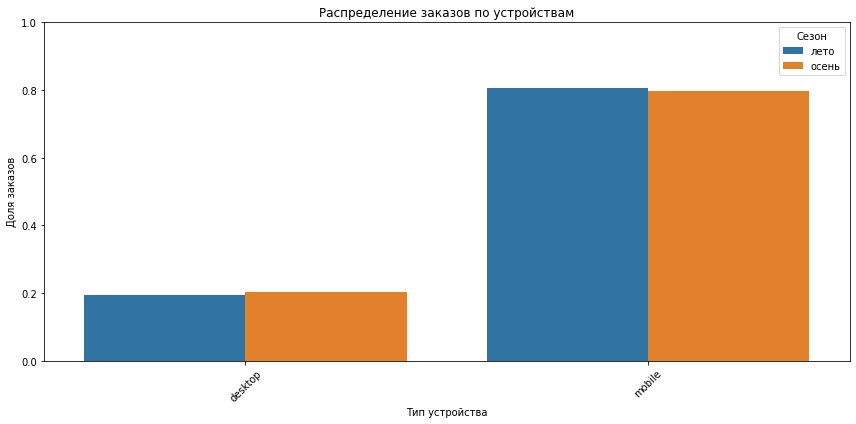

In [35]:
# Подготовка данных для анализа устройств
device_analysis = final_df_cleaned.groupby(['season', 'device_type_canonical']).agg(
    order_count=('order_id', 'nunique')
).groupby('season').apply(lambda x: x / x.sum()).reset_index()
print(device_analysis.sort_values(by=['season', 'order_count'],ascending = False))
# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(
    data=device_analysis,
    x='device_type_canonical',
    y='order_count',
    hue='season',
    ci=None
)
plt.title('Распределение заказов по устройствам')
plt.ylabel('Доля заказов')
plt.xlabel('Тип устройства')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Сезон')
plt.tight_layout()
plt.show()

Мобильные устройства доминируют в обоих сезонах:

Лето: 80.54% заказов через мобильные устройства

Осень: 79.62% заказов через мобильные устройства

  season  age_limit  order_count
8  осень         16     0.261771
5  осень          0     0.234285
7  осень         12     0.221339
6  осень          6     0.177427
9  осень         18     0.105177
3   лето         16     0.282434
2   лето         12     0.205994
1   лето          6     0.182385
0   лето          0     0.179462
4   лето         18     0.149725


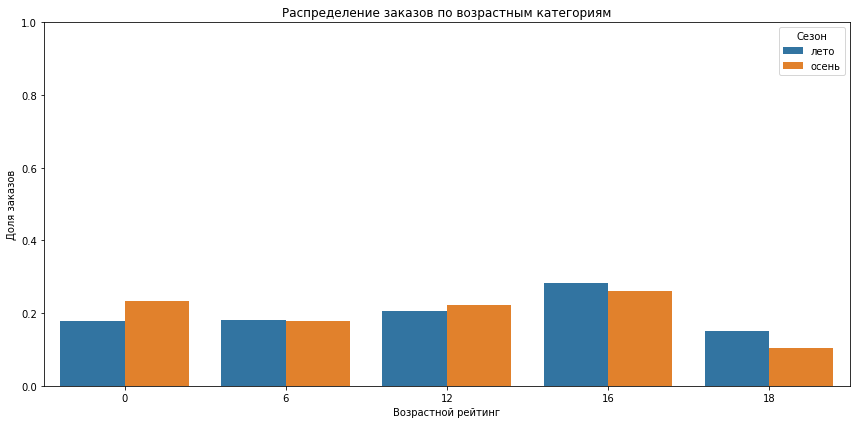

In [36]:
# Подготовка данных для анализа возрастных категорий
age_analysis = final_df_cleaned.groupby(['season', 'age_limit']).agg(
    order_count=('order_id', 'nunique')
).groupby('season').apply(lambda x: x / x.sum()).reset_index()
print(age_analysis.sort_values(by=['season', 'order_count'],ascending = False))
# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(
    data=age_analysis,
    x='age_limit',
    y='order_count',
    hue='season',
    ci=None
)
plt.title('Распределение заказов по возрастным категориям')
plt.ylabel('Доля заказов')
plt.xlabel('Возрастной рейтинг')
plt.ylim(0, 1)
plt.legend(title='Сезон')
plt.tight_layout()
plt.show()

Категория 16+ остается самой популярной в оба сезона

12+ и 0+ показывают близкие доли

Сезонные изменения:

Осенний рост интереса к контенту 0+

Снижение интереса к категории 18+ осенью

Относительная стабильность остальных категорий

Средние цены по сезонам:
season             лето   осень  change_%
event_type_main                          
выставки          86.42   90.94      5.22
другое            80.54   76.99     -4.41
концерты         310.16  274.54    -11.49
спорт             52.57   50.46     -4.01
стендап          221.71  237.00      6.89
театр            219.76  180.57    -17.84
ёлки             274.70  233.37    -15.05


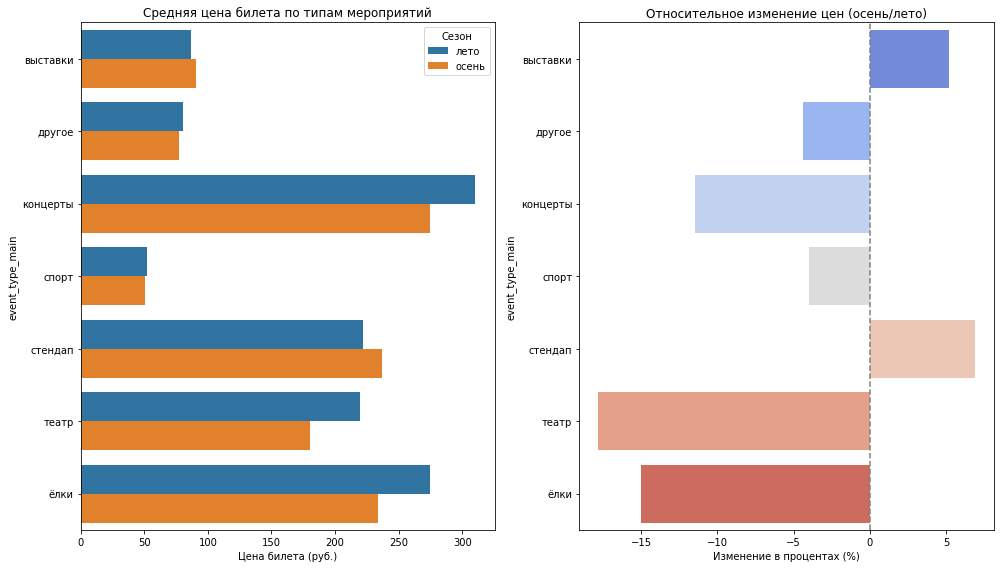

In [37]:
# Рассчитаем среднюю выручку на билет по сезонам и типам мероприятий
avg_ticket_price = final_df_cleaned.groupby(['season', 'event_type_main']).agg(
    avg_price=('one_ticket_revenue_rub', 'mean')
).reset_index()

# Рассчитаем относительное изменение
price_change = pd.pivot_table(
    avg_ticket_price,
    values='avg_price',
    index='event_type_main',
    columns='season'
)

price_change['change_%'] = (price_change['осень'] - price_change['лето']) / price_change['лето'] * 100
# Выводим численные результаты
print("Средние цены по сезонам:")
print(price_change.round(2))
# Визуализация
plt.figure(figsize=(14, 8))

# График средних цен
plt.subplot(1, 2, 1)
sns.barplot(
    data=avg_ticket_price,
    x='avg_price',
    y='event_type_main',
    hue='season',
    ci=None
)
plt.title('Средняя цена билета по типам мероприятий')
plt.xlabel('Цена билета (руб.)')
plt.legend(title='Сезон')

# График относительного изменения
plt.subplot(1, 2, 2)
sns.barplot(
    x=price_change['change_%'],
    y=price_change.index,
    palette='coolwarm'
)
plt.title('Относительное изменение цен (осень/лето)')
plt.xlabel('Изменение в процентах (%)')
plt.axvline(x=0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

**Ценовая динамика:**

Общее снижение цен на билеты в большинстве категорий (5 из 7)

Среднее падение цен составило около 10%

Положительная динамика только в двух категориях: стендап и выставки

Изменения по категориям
Значительное снижение цен:

Театральные мероприятия: падение на 17.84%

Концертные мероприятия: снижение на 11.49%

Новогодние ёлки: уменьшение на 15.05%

Незначительное изменение:

Спортивные мероприятия: снижение на 4.02%

Категория «Другое»: падение на 4.40%

Рост цен:

Стендап-шоу: увеличение на 6.89%

Выставки: рост на 5.26%

## 3.2. Осенняя активность пользователей

In [38]:
# Подготовим данные только за осень 2024
fall_data = final_df_cleaned[final_df_cleaned['season'] == 'осень']

# Создадим сводную таблицу по дням
daily_metrics = fall_data.groupby('created_dt_msk').agg(
    orders_count=('order_id', 'nunique'),
    users_count=('user_id', 'nunique'),
    total_revenue=('revenue_rub', 'sum')
).reset_index()

# Добавим дополнительные метрики
daily_metrics['avg_orders_per_user'] = daily_metrics['orders_count'] / daily_metrics['users_count']
daily_metrics['avg_ticket_price'] = daily_metrics['total_revenue'] / daily_metrics['orders_count']
daily_metrics['day_of_week'] = daily_metrics['created_dt_msk'].dt.day_name()

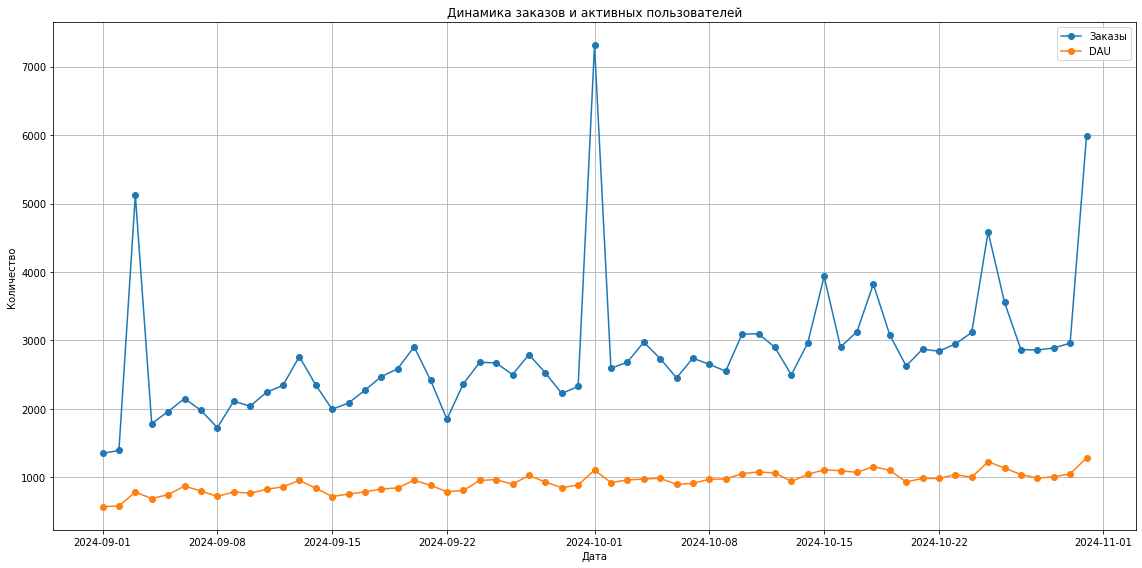


Таблица показателей по дням:
   created_dt_msk  orders_count  users_count
30     2024-10-01          7310         1105
60     2024-10-31          5991         1282
2      2024-09-03          5124          783
54     2024-10-25          4585         1227
44     2024-10-15          3934         1108
..            ...           ...          ...
21     2024-09-22          1849          788
3      2024-09-04          1784          688
7      2024-09-08          1724          720
1      2024-09-02          1391          580
0      2024-09-01          1348          569

[61 rows x 3 columns]


In [39]:
plt.figure(figsize=(16, 8))
plt.plot(daily_metrics['created_dt_msk'], daily_metrics['orders_count'], label='Заказы', marker='o')
plt.plot(daily_metrics['created_dt_msk'], daily_metrics['users_count'], label='DAU', marker='o')
plt.title('Динамика заказов и активных пользователей')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
# Выводим таблицу с данными
print("\nТаблица показателей по дням:")
print(daily_metrics[['created_dt_msk', 'orders_count', 'users_count']].round(0).sort_values(by='orders_count', ascending=False))

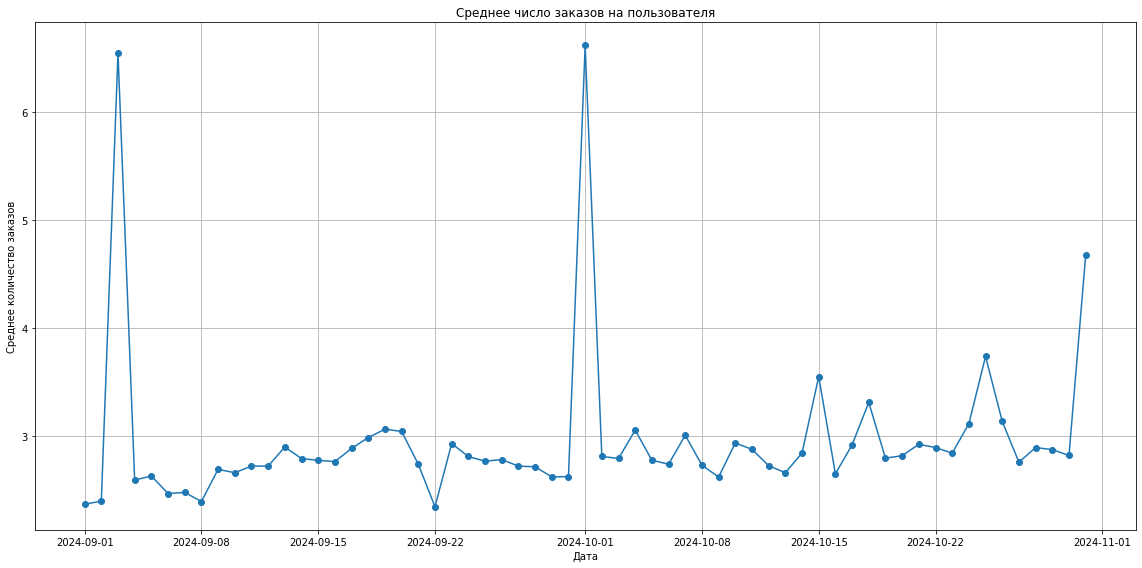


Таблица показателей по дням:
   created_dt_msk  avg_orders_per_user
30     2024-10-01                 6.62
2      2024-09-03                 6.54
60     2024-10-31                 4.67
54     2024-10-25                 3.74
44     2024-10-15                 3.55
..            ...                  ...
5      2024-09-06                 2.47
1      2024-09-02                 2.40
7      2024-09-08                 2.39
0      2024-09-01                 2.37
21     2024-09-22                 2.35

[61 rows x 2 columns]


In [40]:
# среднее число заказов на пользователя
plt.figure(figsize=(16, 8))
plt.plot(daily_metrics['created_dt_msk'], daily_metrics['avg_orders_per_user'], marker='o')
plt.title('Среднее число заказов на пользователя')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.grid()
plt.tight_layout()
plt.show()
# Выводим таблицу с данными
print("\nТаблица показателей по дням:")
print(daily_metrics[['created_dt_msk', 'avg_orders_per_user']].round(2).sort_values(by='avg_orders_per_user', ascending=False))

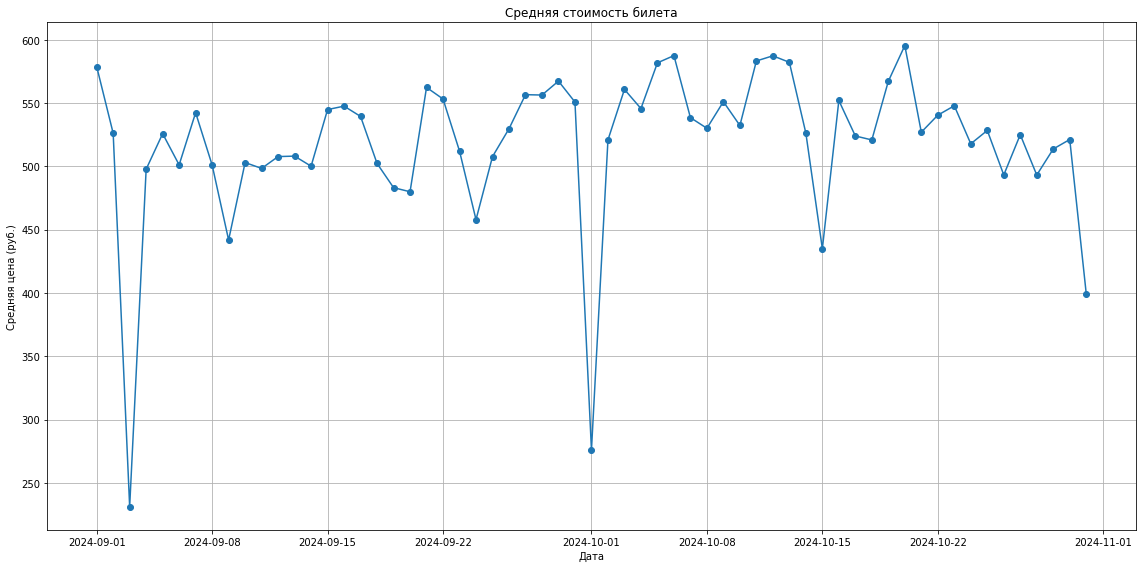


Таблица показателей по дням:
   created_dt_msk  avg_ticket_price
49     2024-10-20            595.38
35     2024-10-06            587.44
41     2024-10-12            587.29
40     2024-10-11            583.21
42     2024-10-13            582.13
..            ...               ...
8      2024-09-09            441.82
44     2024-10-15            434.93
60     2024-10-31            399.40
30     2024-10-01            275.98
2      2024-09-03            231.19

[61 rows x 2 columns]


In [41]:
# Средняя стоимость одного билета
plt.figure(figsize=(16, 8))
plt.plot(daily_metrics['created_dt_msk'], daily_metrics['avg_ticket_price'], marker='o')
plt.title('Средняя стоимость билета')
plt.xlabel('Дата')
plt.ylabel('Средняя цена (руб.)')
plt.grid()
plt.tight_layout()
plt.show()
print("\nТаблица показателей по дням:")
print(daily_metrics[['created_dt_msk', 'avg_ticket_price']].round(2).sort_values(by='avg_ticket_price', ascending=False))

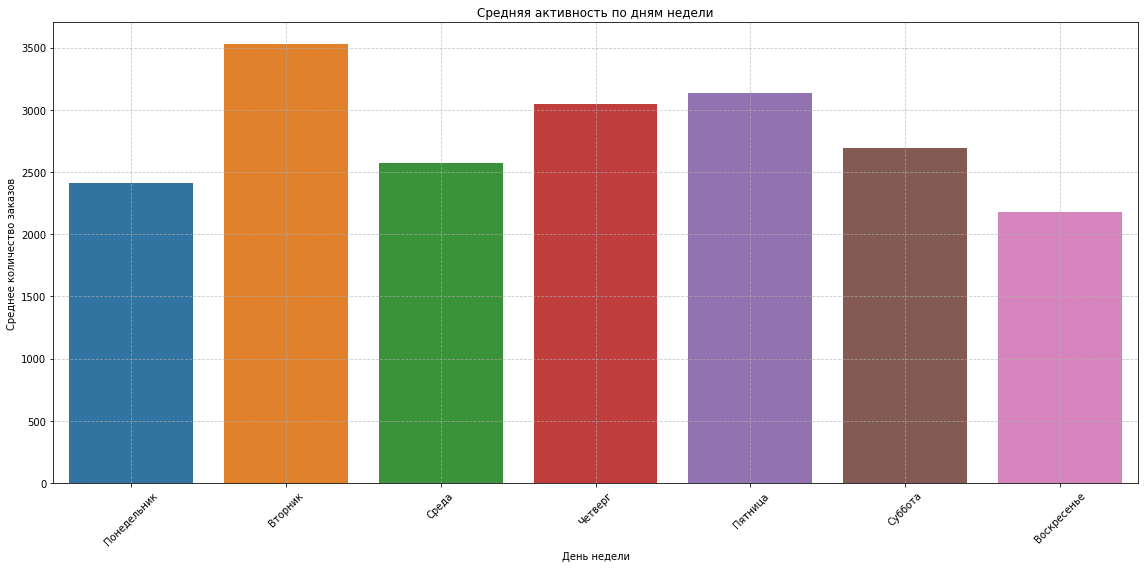

Сводная статистика по дням недели:
  day_of_week_ru  avg_orders  avg_users  avg_orders_per_user
5        Вторник     3526.22     939.89                 3.73
0        Пятница     3136.00    1029.38                 3.01
4        Четверг     3043.44     968.11                 3.07
2        Суббота     2692.62     967.00                 2.77
6          Среда     2568.67     931.00                 2.76
1    Понедельник     2411.89     859.22                 2.79
3    Воскресенье     2175.44     827.44                 2.61


In [42]:
# Группируем по дням недели
weekday_metrics = daily_metrics.groupby('day_of_week').agg(
avg_orders=('orders_count', 'mean'),
avg_users=('users_count', 'mean'),
avg_orders_per_user=('avg_orders_per_user', 'mean')
).reset_index()
# Создадим словарь для перевода дней недели
days_translation = {
    'Monday': 'Понедельник',
    'Tuesday': 'Вторник',
    'Wednesday': 'Среда',
    'Thursday': 'Четверг',
    'Friday': 'Пятница',
    'Saturday': 'Суббота',
    'Sunday': 'Воскресенье'
}

# Переведем дни недели в датафрейме
weekday_metrics['day_of_week_ru'] = weekday_metrics['day_of_week'].map(days_translation)

# Визуализация недельной цикличности
plt.figure(figsize=(16, 8))
sns.barplot(
    data=weekday_metrics,
    x='day_of_week_ru',
    y='avg_orders',
    order=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
)
plt.title('Средняя активность по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее количество заказов')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Выведем сводную статистику с русскими названиями дней
print("Сводная статистика по дням недели:")
print(weekday_metrics[['day_of_week_ru', 'avg_orders', 'avg_users', 'avg_orders_per_user']].round(2).sort_values(by='avg_orders', ascending=False))

Общая активность:
- Максимальное количество заказов зафиксировано 1 октября 2024 (7310 заказов)
- Минимальная активность наблюдается в начале сентября (1348 заказов 1 сентября)
- Средний показатель заказов варьируется от 1300 до 7300 в день
- Наивысшая активность пользователей 1 октября: 6.62 заказа на пользователя
- Средний показатель в сентябре-октябре колеблется от 2.35 до 6.62 заказов на пользователя
- Снижение активности к концу октября до 4.67 заказов на пользователя
На основе проведенного анализа можно сделать вывод:
- Наблюдается заметный рост активности к октябрю
- пик приходится на начало октября

По недельной активности можно сделать следующие выводы:
- Вторник показывает наивысшую активность: 3526.56 заказов в среднем 3.73 заказа на пользователя
- Пятница занимает второе место: 3136.12 заказов 3.01 заказа на пользователя
- Воскресенье демонстрирует наименьшую активность: 2175.44 заказов 2.61 заказа на пользователя
- Среда также показывает невысокие показатели: 2569.11 заказов 2.76 заказа на пользователя
На основе анализа наблюдается: 
- Рост активности к середине недели, падение в выходные дни
- Вторник — самый активный день

Т.е. большинство пользователей начинают планировать посетить мероприятия в начале недели.

## 3.3. Популярные события и партнёры

In [43]:
# Анализ регионов
# воспользуемся таблицей fall_data для анализа осенней активности
region_analysis = fall_data.groupby('region_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'nunique'),
    total_revenue=('revenue_rub', 'sum')
).reset_index()
# Округление выручки до 2 знаков после запятой
region_analysis['total_revenue'] = region_analysis['total_revenue'].round(2)
# Добавляем доли
region_analysis['event_share'] = region_analysis['unique_events'] / region_analysis['unique_events'].sum()
region_analysis['order_share'] = region_analysis['total_orders'] / region_analysis['total_orders'].sum()

# Сортировка по количеству мероприятий
region_analysis = region_analysis.sort_values(by='unique_events', ascending=False)
print(region_analysis.head(10))

                region_name  unique_events  total_orders  total_revenue  \
23       Каменевский регион           3946         47514    30741104.29   
59     Североярская область           2622         20897    10992697.99   
75      Широковская область            803          8739     4289528.14   
56     Светополянский округ            764          4840     2144228.14   
51      Речиновская область            529          3576     1769197.49   
60     Серебринская область            456          4477     1588426.77   
76      Яблоневская область            432          4223     2005227.04   
67     Тепляковская область            420          2487      775245.52   
11     Горицветская область            406          3235     1127273.28   
63  Солнечноземская область            403          4232      873088.31   

    event_share  order_share  
23     0.247802     0.279231  
59     0.164657     0.122808  
75     0.050427     0.051358  
56     0.047978     0.028444  
51     0.033220    

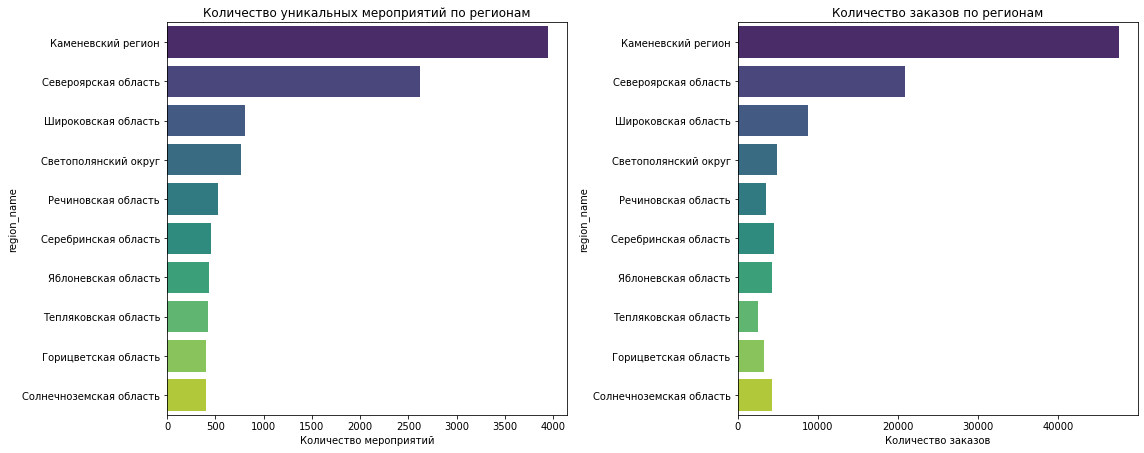

In [44]:
# Визуализация
plt.figure(figsize=(16, 12))

# График по регионам
plt.subplot(2, 2, 1)
sns.barplot(
    data=region_analysis.head(10),
    x='unique_events',
    y='region_name',
    palette='viridis'
)
plt.title('Количество уникальных мероприятий по регионам')
plt.xlabel('Количество мероприятий')

plt.subplot(2, 2, 2)
sns.barplot(
    data=region_analysis.head(10),
    x='total_orders',
    y='region_name',
    palette='viridis'
)
plt.title('Количество заказов по регионам')
plt.xlabel('Количество заказов')
plt.tight_layout()
plt.show()

In [45]:
# Анализ партнеров (используем service_name)
# Также проведем анализ осенней активности
partner_analysis = fall_data.groupby('service_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'nunique'),
    total_revenue=('revenue_rub', 'sum')
).reset_index()
partner_analysis['total_revenue'] = partner_analysis['total_revenue'].round(2)
# Добавляем доли
partner_analysis['event_share'] = partner_analysis['unique_events'] / partner_analysis['unique_events'].sum()
partner_analysis['order_share'] = partner_analysis['total_orders'] / partner_analysis['total_orders'].sum()
partner_analysis['revenue_share'] = partner_analysis['total_revenue'] / partner_analysis['total_revenue'].sum()

# Сортировка по выручке
partner_analysis = partner_analysis.sort_values(by='total_revenue', ascending=False)
print(partner_analysis.head(10))

          service_name  unique_events  total_orders  total_revenue  \
3   Билеты без проблем           2855         32788    13157279.55   
24           Мой билет           1012         19679    11526859.32   
25             Облачко           1413         15616    10965822.09   
21         Лови билет!           3626         25871    10579916.20   
8       Весь в билетах            608          9642     9932279.46   
5        Билеты в руки           2472         25758     7690963.57   
19        Край билетов            194          3062     3185474.54   
34              Яблоко            538          3496     2822460.71   
26           Прачечная            728          5831     2633146.87   
30         Тебе билет!            859          3779     2215030.04   

    event_share  order_share  revenue_share  
3      0.164544     0.192689       0.153307  
24     0.058325     0.115650       0.134310  
25     0.081436     0.091772       0.127773  
21     0.208979     0.152039       0.123276  

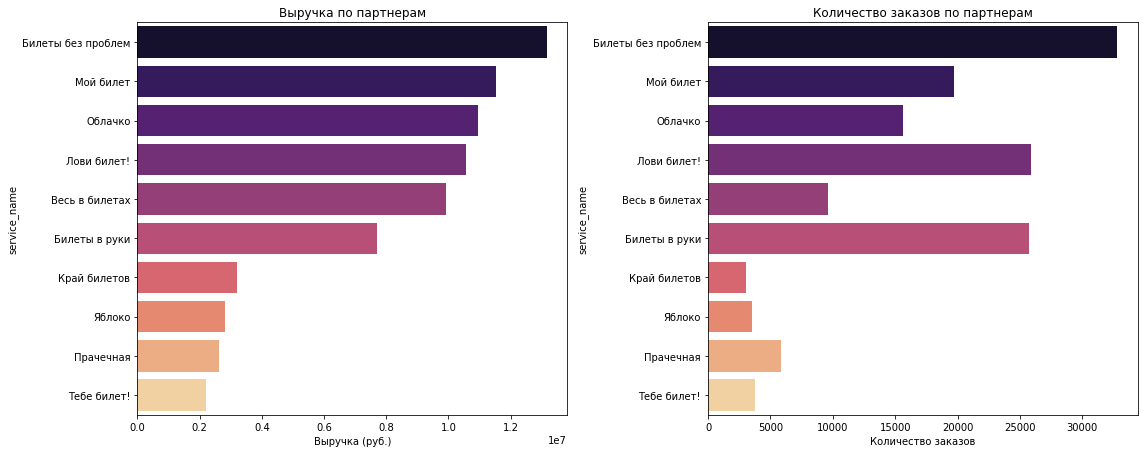

In [46]:
# Визуализация
plt.figure(figsize=(16, 12))
# График по партнерам
plt.subplot(2, 2, 3)
sns.barplot(
    data=partner_analysis.head(10),
    x='total_revenue',
    y='service_name',
    palette='magma'
)
plt.title('Выручка по партнерам')
plt.xlabel('Выручка (руб.)')

plt.subplot(2, 2, 4)
sns.barplot(
    data=partner_analysis.head(10),
    x='total_orders',
    y='service_name',
    palette='magma'
)
plt.title('Количество заказов по партнерам')
plt.xlabel('Количество заказов')

plt.tight_layout()
plt.show()

Каменевский регион доминирует по всем показателям:
- 24.8% всех уникальных мероприятий
- 27.9% всех заказов
- 30.7 млн руб. выручки
Наибольшее количество уникальных событий в Каменевском регионе (3946)

Второе место — Североярская область (2622)

Остальные регионы значительно отстают

Топ-2 региона обеспечивают более 41% всех мероприятий

Каменевский регион практически более чем в 1.5 раза опережает ближайшего конкурента

«Билеты без проблем»:
- 16.4% всех мероприятий
- 19.2% всех заказов
- 13.1 млн руб. выручки
- Доля в общей выручке: 15.3%

 «Мой билет»:
- 5.8% всех мероприятий
- 11.6% заказов
- 11.5 млн руб. выручки
- Доля в общей выручке: 13.4%

Облачко:
- 8.1% мероприятий
- 9.1% заказов
- 10.9 млн руб. выручки
- Доля в общей выручке: 12.8%



«Билеты без проблем» и «Мой билет» — основные источники выручки

«Лови билет!» — лидер по количеству мероприятий(20.9%)

# Шаг 4: Статистический анализ данных

Нам необходимо проверить две гипотезы:
- Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Цели исследования:

Необходимо сравнить средние значения между двумя группами

Требуется определить статистическую значимость различий

In [47]:
# Фильтрация данных по осеннему периоду
fall_data = final_df_cleaned[final_df_cleaned['season'] == 'осень']

# Разделение данных по устройствам
mobile_data = fall_data[fall_data['device_type_canonical'] == 'mobile']
desktop_data = fall_data[fall_data['device_type_canonical'] == 'desktop']

Мы будем проводить одностороний t-тест т.к.:

- В обоих случаях мы сравниваем количественные показатели (количество заказов и время между заказами)
- Данные представлены в виде непрерывных числовых значений
- Мы имеем дело с независимыми выборками (мобильные и десктопные пользователи)
- Группы не пересекаются между собой
- Уровень значимости примем 0.05

**Сформулируем первую гипотизу:**
- H0: Среднее количество заказов на пользователя мобильных устройств ≤ стационарных устройств
- H1: Среднее количество заказов на пользователя мобильных устройств > стационарных устройств

In [48]:
# Подготовка данных для тестирования
mobile_group = mobile_data.groupby('user_id')['order_id'].nunique()
desktop_group = desktop_data.groupby('user_id')['order_id'].nunique()
# Проверка размеров выборок
mobile_size = len(mobile_group)
desktop_size = len(desktop_group)
size_ratio = abs(mobile_size - desktop_size) / max(mobile_size, desktop_size)
display('Проверка размеров выборок:')
display(f'Мобильные {mobile_size}')
display(f'Стационарные {desktop_size}')
display(f'Разница {size_ratio*100:.2f}%')
# Проверка на выбросы
display("Проверка на выбросы:")
print(f"Мобильные данные: {mobile_group.describe()}")
print(f"Десктопные данные: {desktop_group.describe()}")

'Проверка размеров выборок:'

'Мобильные 14239'

'Стационарные 4906'

'Разница 65.55%'

'Проверка на выбросы:'

Мобильные данные: count    14239.000000
mean         9.514573
std         68.480080
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       4365.000000
Name: order_id, dtype: float64
Десктопные данные: count    4906.000000
mean        7.069303
std        36.174169
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      1510.000000
Name: order_id, dtype: float64


При подготовке данных для проведения теста мы наблюдаем наличие выбросов(для их устранения мы отфильтруем данные по 99 квантилю).

Так же наши выборки имеют разный размер(Разница 65.55%) при тестировании будем применять поправку Уэлча.  

In [49]:
# Очищаем данные от выбросов
mobile_clean = mobile_group[mobile_group < mobile_group.quantile(0.99)]
desktop_clean = desktop_group[desktop_group < desktop_group.quantile(0.99)]
#Проверим результат
print(f"Мобильные данные: {mobile_clean.describe()}")
print(f"Десктопные данные: {desktop_clean.describe()}")

Мобильные данные: count    14094.000000
mean         5.198028
std         10.485241
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        114.000000
Name: order_id, dtype: float64
Десктопные данные: count    4856.000000
mean        4.485379
std         9.396002
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       102.000000
Name: order_id, dtype: float64


In [50]:
# Расчет средних значений
mobile_avg_orders = mobile_clean.mean()
desktop_avg_orders = desktop_clean.mean()
# после подготоки данных проведем t-тест
t_stat, p_value = ttest_ind(
    mobile_clean,
    desktop_clean,
    alternative='greater', # проводим правосторонний тест (мобильных устройств > стационарных устройств)
    equal_var=False  # поправка Уэлча
)
# Выводим результаты
print("Результаты t-теста для гипотезы о количестве заказов:")
print(f"Среднее количество заказов на мобильного пользователя: {mobile_avg_orders:.2f}")
print(f"Среднее количество заказов на десктопного пользователя: {desktop_avg_orders:.2f}")
print(f"\nT-статистика: {t_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

# Интерпретация результатов
if p_value < 0.05:
    print("\nГипотеза подтверждена: мобильные пользователи делают статистически значимо больше заказов")
else:
    print("\nГипотеза не подтверждена: нет статистически значимых различий в количестве заказов")

Результаты t-теста для гипотезы о количестве заказов:
Среднее количество заказов на мобильного пользователя: 5.20
Среднее количество заказов на десктопного пользователя: 4.49

T-статистика: 4.4213
P-значение: 0.0000

Гипотеза подтверждена: мобильные пользователи делают статистически значимо больше заказов


Мобильные пользователи более активны в совершении заказов.

Существует значимая разница в покупательском поведении.

Сформулируем вторую  гипотезу:
- H0: Среднее время между заказами мобильных пользователей ≤ стационарных
- H1: Среднее время между заказами мобильных пользователей > стационарных

Т.к. нам известно о разном размере выборок при тестировании так же применим поправку Уэлча.

In [51]:
# Шаг 2: Удаление пропусков в исходных данных
mobile_data_clean = mobile_data.dropna(subset=['days_since_prev'])
desktop_data_clean = desktop_data.dropna(subset=['days_since_prev'])
# Расчет времени
mobile_time = mobile_data_clean.groupby('user_id')['days_since_prev'].mean()
desktop_time = desktop_data_clean.groupby('user_id')['days_since_prev'].mean()

In [52]:
# Проведение t-теста
t_stat_time, p_value_time = ttest_ind(
    mobile_time,
    desktop_time,
    alternative='greater', # проводим правосторонний тест(время между заказами мобильных пользователей > стационарных)
    equal_var=False  # поправка Уэлча
)
# Рассчитываем средние значения для наглядности
avg_mobile_time = mobile_time.mean()
avg_desktop_time = desktop_time.mean()

# Выводим результаты
print("\nРезультаты t-теста для гипотезы о времени между заказами:")
print(f"Среднее время между заказами для мобильных пользователей: {avg_mobile_time:.2f} дней")
print(f"Среднее время между заказами для десктопных пользователей: {avg_desktop_time:.2f} дней")
print(f"\nT-статистика: {t_stat_time:.4f}")
print(f"P-значение: {p_value_time:.4f}")

# Интерпретация результатов
if p_value_time < 0.05:
    print("\nГипотеза подтверждена: время между заказами у мобильных пользователей статистически значимо больше")
else:
    print("\nГипотеза не подтверждена: нет статистически значимых различий во времени между заказами")

# Дополнительные метрики
print("\nДополнительные метрики:")
print(f"Разница средних: {avg_mobile_time - avg_desktop_time:.2f} дней")
print(f"Процентное различие: {(avg_mobile_time - avg_desktop_time)/avg_desktop_time*100:.2f}%")


Результаты t-теста для гипотезы о времени между заказами:
Среднее время между заказами для мобильных пользователей: 20.65 дней
Среднее время между заказами для десктопных пользователей: 14.96 дней

T-статистика: 12.1947
P-значение: 0.0000

Гипотеза подтверждена: время между заказами у мобильных пользователей статистически значимо больше

Дополнительные метрики:
Разница средних: 5.69 дней
Процентное различие: 38.07%


Мобильные пользователи имеют более длительные паузы между заказами.

# Шаг 5: Общий вывод и рекомендации

### Общая информация

Мы работали с данными о бронировании билетов на сервисе Яндекс Афиша

**Период исследования:** 1 июня — 30 октября 2024 года

---

### 1. Популярность типов мероприятий

#### Сезонные тренды
* **Концерты** сохраняют лидерство:
  * Лето: **42.79%**
  * Осень: **37.45%**
* **Театральные постановки** показали рост:
  * Осень: **25.33%** (+5.22 п.п. к лету)
  * Лето: **20.11%**

---

### 2. Цены на билеты

* **Общее снижение цен** в 5 из 7 категорий (~10%)
* **Рост цен** зафиксирован в:
  * Стендап-шоу
  * Выставки

---

### 3. Региональный анализ

#### Лидеры по показателям
* **Каменевский регион:**
  * **24.8%** всех мероприятий
  * **27.9%** всех заказов
  * **30.7 млн руб.** выручки
  * **3946** уникальных события

* **Североярская область:**
  * **2662** уникальных событий
  * **16%** всех мероприятий

* **Топ-2 региона:**
  * Обеспечивают **41%** всех мероприятий
  * Каменевский регион более чем в 1.5 раза опережает конкурента

---

### 4. Анализ билетных партнеров

#### Ключевые партнеры
* **«Билеты без проблем»:**
  * **16.4%** мероприятий
  * **19.2%** заказов
  * **13. млн руб.** выручки
  * **15.3** общей выручки

* **«Мой билет
  * **5.8%** мероприятий (лидер)
  * **11.6%** заказов
  * **11.5 млн руб.** выручки
  * **13.2%** общей выручки

* **«Облачко»:**
  * **8.1%** мероприятий
  * **9.1%** заказов
  * **10.9 млн руб.** выручки
  * **12.8%** общей выручки

---

### 5. Результаты тестирования гипотез

#### Подтвержденные выводы:
* **Мобильные пользователи:**
  * Более активны в заказах (**5.2** против **4.49**)
  * Имеют больший интервал между заказами (**38.07%** разница)

---

### Рекомендации
* Развивать сотрудничество с партнерами «Билеты без проблем» и «Мой билет»
* Отслеживать ценовую динамику по категориям
* Оптимизировать мобильное приложение с учетом поведенческих особенностей пользователей
